## Catalog of model globular clusters in the Milky Way and M31 galaxies

This is a mock catalog of globular clusters calculated with a model for the formation and evolution of globular cluster systems. This catalog and the current version of the model are published in [Chen & Gnedin (2023b)](https://arxiv.org/abs/2309.13374). It is based on the earlier versions developed in [Muratov & Gnedin (2010)](https://ui.adsabs.harvard.edu/abs/2010ApJ...718.1266M/abstract), [Li & Gnedin (2014)](https://ui.adsabs.harvard.edu/abs/2014ApJ...796...10L/abstract), [Choksi et al. 2018](https://ui.adsabs.harvard.edu/abs/2018MNRAS.480.2343C/abstract),
[Choksi & Gnedin 2019a](https://ui.adsabs.harvard.edu/abs/2019MNRAS.486..331C/abstract),
[Choksi & Gnedin 2019b](https://ui.adsabs.harvard.edu/abs/2019MNRAS.488.5409C/abstract),
[Chen & Gnedin (2022)](https://ui.adsabs.harvard.edu/abs/2022MNRAS.514.4736C/abstract),
[Chen & Gnedin (2023a)](https://ui.adsabs.harvard.edu/abs/2023MNRAS.522.5638C/abstract).

The catalog matches the observed mass function, radial and velocity dispersion profiles, and the age-metallicity distribution (as much as possible) of the globular cluster systems in the MW and M31. The spatial and kinematic information is based on tagging particles from the [Illustris TNG50 simulation](https://www.tng-project.org/data/downloads/TNG50-1/) or the [Local Group simulation](https://ui.adsabs.harvard.edu/abs/2023MNRAS.522.5638C/abstract).

The catalog of clusters remaining gravitationally bound to redshift $z=0$ provides the information on cluster age, mass at formation and at $z=0$, Cartesian coordinates and velocities at $z=0$, orbital actions in the best-fitting halo+disk galaxy potential, apocenter and pericenter radii, value of the potential, cluster iron metallicity, total and stellar mass of host galaxy at formation, and total and stellar mass of host galaxy at $z=0$. The catalog also contains tags `host_id_form` and `host_id_accrete` to mark clusters formed in the central halo (_in-situ_) and in satellite galaxies (_ex-situ_), and gives the time of accretion for the _ex-situ_ clusters.

The catalog of disrupted clusters contains also the time of disruption. The coordinates and other orbital information is for the center of mass of the resulting stellar stream. The model generates clusters with a minimum initial mass of $10^4$ M$_\odot\,$. Less massive clusters are expected to be disrupted by the present time.

The MW catalog contains 3 systems most resembling the Milky Way in their mass assembly history and in the properties of the GC system. Each galaxy provides an alternative possible history of the assembly of the MW globular cluster system. GC systems can be analyzed for all 3 galaxies combined, or for each galaxy separately.

The M31 catalog similarly contains 3 systems most resembling the Andromeda galaxy in their mass assembly history and in the properties of the GC system. Each galaxy provides an alternative possible history of the assembly of the M31 globular cluster system. The adjustable model parameters are the same as for the MW catalog.

This notebook provides examples of reading the cluster catalog and making plots.

The format of the catalog files:

In [1]:
dtype = {
    'names': (
        'galaxy_id',       # SUBFIND (TNG) or ROCKSTAR (LG) ID of the current central galaxy.
        't_form',          # Formation time (lookback) of the cluster. [Gyr]
        't_disrupt',       # Disruption time (lookback) of the cluster; −1 for surviving clusters. [Gyr]
        't_accrete',       # Accretion time (lookback) of the cluster; −1 for in-situ clusters. [Gyr]
        'log_m_form',      # log10 of the cluster mass at formation. [Msun]
        'log_m_gc',        # log10 of the current cluster mass; −1 for disrupted clusters. [Msun]
        'x', 'y', 'z',     # Galactocentric coordinates, with z as the disk angular momentum axis. [kpc]
        'vx', 'vy', 'vz',  # Galactocentric velocity components. [km/s]
        'Jr', 'Jz', 'Jp',  # Orbital actions; 0 for LG. [kpc km/s]
        'rapo', 'rperi',   # Apocenter and pericenter radii; 0 for LG. [kpc]
        'Ep',              # Gravitational potential by multiple expansion and spline approximation; 0 for LG. [km^2/s^2]
        'feh',             # Iron abundance [Fe/H].
        'host_id_form',    # SUBLINK or ROCKSTAR ID (main leaf) for the host galaxy at cluster formation.
        'host_id_accrete', # SUBLINK or ROCKSTAR ID (main leaf) for the host galaxy at cluster accretion; −1 for in-situ clusters.
        'log_mh_form',     # log10 of host galaxy total mass at cluster formation. [Msun]
        'log_ms_form',     # log10 of host galaxy stellar mass at cluster formation, from Behroozi+13 SMHM relation. [Msun]
        'log_mh',          # log10 of current central total mass. [Msun]
        'log_ms',          # log10 of current central stellar mass, from Behroozi+13 SMHM relation. [Msun]
        'log_ms_k18'       # log10 of current central stellar mass, from Kravtsov+18 SMHM relation. [Msun]
    ),  
    'formats': (
        'i8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8',
        'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'i8', 'i8', 'f8', 'f8', 'f8', 'f8', 'f8')}

## Globular cluster systems of Milky Way analogs

Load the catalog of clusters survived until z=0 and expected to be detectable as Galactic globular clusters:

In [2]:
import numpy as np

data_s = np.loadtxt('mw_chen_gnedin_2023.txt', dtype=dtype)

Load the catalog of clusters fully disrupted before z=0 and expected to be detectable as stellar streams:

In [3]:
data_d = np.loadtxt('mw_chen_gnedin_2023_disrupt.txt', dtype=dtype)

Both catalogs contain GC systems of 3 simulated galaxies most resembling the Milky Way. The first two are from  the TNG50 simulation, with the halo identifiers at $z=0$ ID = `519311, 523889`. The third one is from the LG simulation with ID = `1887674` ("Romeo"). The total halo mass and the stellar mass of these halos (in solar masses) at $z=0$ are printed below. Stellar mass can be calculated either from the [Universe Machine, Behroozi et al. 2013](https://www.peterbehroozi.com/data.html) `(B13)` or from [Kravtsov et al. 2018](https://ui.adsabs.harvard.edu/abs/2018AstL...44....8K/abstract) `(K18)`. The former may be an underestimate, but it is used to run the model calculation at $z>0$.

In [4]:
for hid in np.unique(data_s['galaxy_id']):
    print('hid=', hid,\
          'log Mhalo=', data_s['log_mh'][data_s['galaxy_id']==hid][0],\
          'log Mstellar(B13)=', data_s['log_ms'][data_s['galaxy_id']==hid][0],\
          'log Mstellar(K18)=', data_s['log_ms_k18'][data_s['galaxy_id']==hid][0])

hid= 519311 log Mhalo= 12.144 log Mstellar(B13)= 10.612 log Mstellar(K18)= 10.737
hid= 523889 log Mhalo= 12.073 log Mstellar(B13)= 10.623 log Mstellar(K18)= 10.674
hid= 1887674 log Mhalo= 12.108 log Mstellar(B13)= 10.902 log Mstellar(K18)= 10.706


Example below plots the GC mass at z=0 vs. metallicity for galaxy 519311:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('mplstyle.txt')

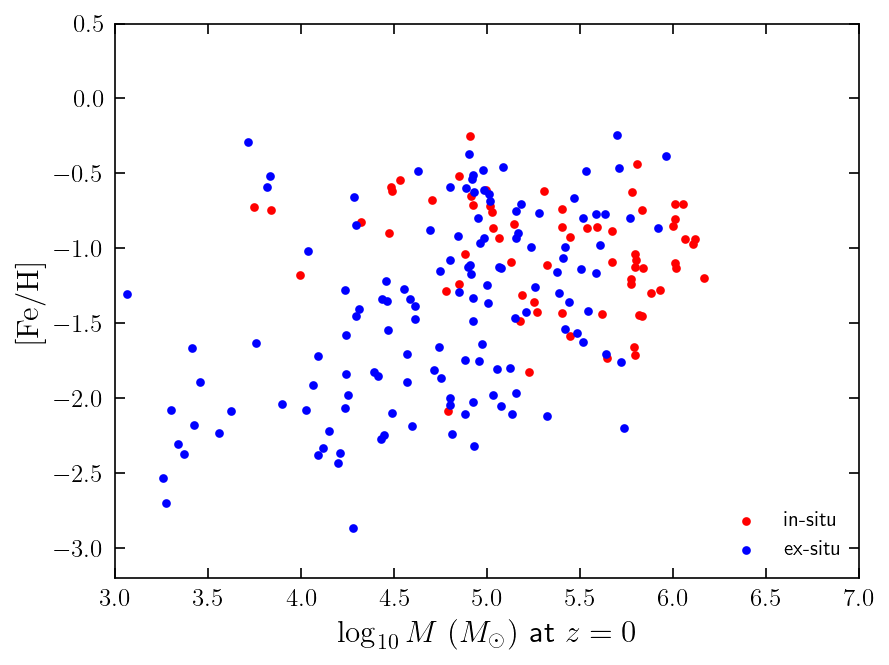

In [6]:
hid = 519311

# select survived clusters
idx_in = (data_s['host_id_accrete'] < 0) & (data_s['galaxy_id'] == hid)
idx_ex = (data_s['host_id_accrete'] > 0) & (data_s['galaxy_id'] == hid)

# plot clusters formed in-situ (in the central halo) as red
plt.scatter(data_s['log_m_gc'][idx_in], data_s['feh'][idx_in], fc='r', s=10, label='in-situ')

# plot clusters formed ex-situ (in satellite galaxies) as blue
plt.scatter(data_s['log_m_gc'][idx_ex], data_s['feh'][idx_ex], fc='b', s=10, label='ex-situ')

plt.xlabel(r'$\log_{10} M\ (M_\odot)$ at $z=0$')
plt.ylabel(r'$\rm [Fe/H]$')
plt.xlim(3, 7)
plt.ylim(-3.2, 0.5)
plt.legend(loc='lower right');

And the metallicity of disrupted clusters vs. their initial mass, which gives an estimate of the stellar stream:

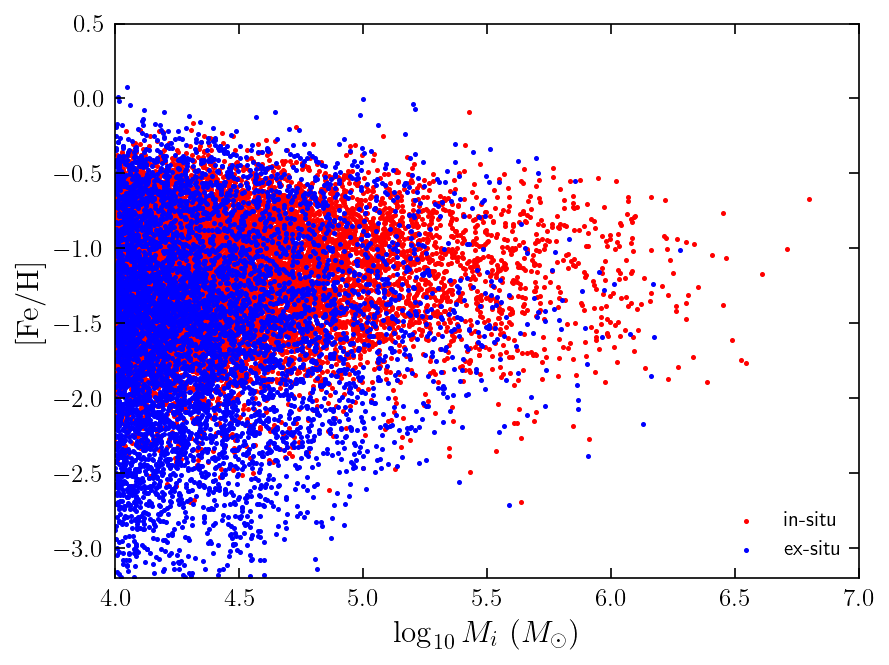

In [7]:
# select survived clusters
idx_in = (data_d['host_id_accrete'] < 0) & (data_d['galaxy_id'] == hid)
idx_ex = (data_d['host_id_accrete'] > 0) & (data_d['galaxy_id'] == hid)

# plot clusters formed in-situ (in the central halo) as red
plt.scatter(data_d['log_m_form'][idx_in], data_d['feh'][idx_in], fc='r', s=2, label='in-situ')

# plot clusters formed ex-situ (in satellite galaxies) as blue
plt.scatter(data_d['log_m_form'][idx_ex], data_d['feh'][idx_ex], fc='b', s=2, label='ex-situ')

plt.xlabel(r'$\log_{10} M_i\ (M_\odot)$')
plt.ylabel(r'$\rm [Fe/H]$')
plt.xlim(4, 7)
plt.ylim(-3.2, 0.5)
plt.legend(loc='lower right');

## Globular cluster systems of M31 analogs

All three M31 analogs are based on the TNG50 galaxies.

In [8]:
data_m31s = np.loadtxt('m31_chen_gnedin_2023.txt', dtype=dtype)

data_m31d = np.loadtxt('m31_chen_gnedin_2023_disrupt.txt', dtype=dtype)

In [9]:
for hid in np.unique(data_m31s['galaxy_id']):
    print('hid=', hid,\
          'log Mhalo=', data_m31s['log_mh'][data_m31s['galaxy_id']==hid][0],\
          'log Mstellar(B13)=', data_m31s['log_ms'][data_m31s['galaxy_id']==hid][0],\
          'log Mstellar(K18)=', data_m31s['log_ms_k18'][data_m31s['galaxy_id']==hid][0])

hid= 441709 log Mhalo= 12.476 log Mstellar(B13)= 10.705 log Mstellar(K18)= 10.986
hid= 474008 log Mhalo= 12.322 log Mstellar(B13)= 10.853 log Mstellar(K18)= 10.878
hid= 532301 log Mhalo= 12.112 log Mstellar(B13)= 10.492 log Mstellar(K18)= 10.709


Example below plots the GC mass at $z=0$ vs. metallicity for galaxy 532301:

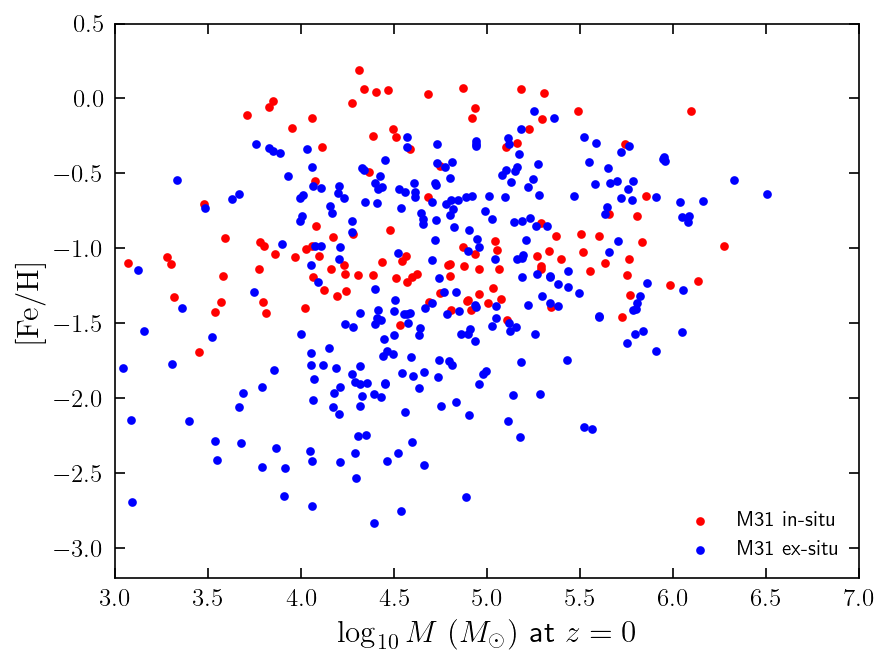

In [10]:
hid = 532301

# select survived clusters
idx_in = (data_m31s['host_id_accrete'] < 0) & (data_m31s['galaxy_id'] == hid)
idx_ex = (data_m31s['host_id_accrete'] > 0) & (data_m31s['galaxy_id'] == hid)

# plot clusters formed in-situ (in the central halo) as red
plt.scatter(data_m31s['log_m_gc'][idx_in], data_m31s['feh'][idx_in], fc='r', s=10, label='M31 in-situ')

# plot clusters formed ex-situ (in satellite galaxies) as blue
plt.scatter(data_m31s['log_m_gc'][idx_ex], data_m31s['feh'][idx_ex], fc='b', s=10, label='M31 ex-situ')

plt.xlabel(r'$\log_{10} M\ (M_\odot)$ at $z=0$')
plt.ylabel(r'$\rm [Fe/H]$')
plt.xlim(3, 7)
plt.ylim(-3.2, 0.5)
plt.legend(loc='lower right');

The metallicity of disrupted clusters vs. their initial mass, which gives an estimate of the stellar stream:

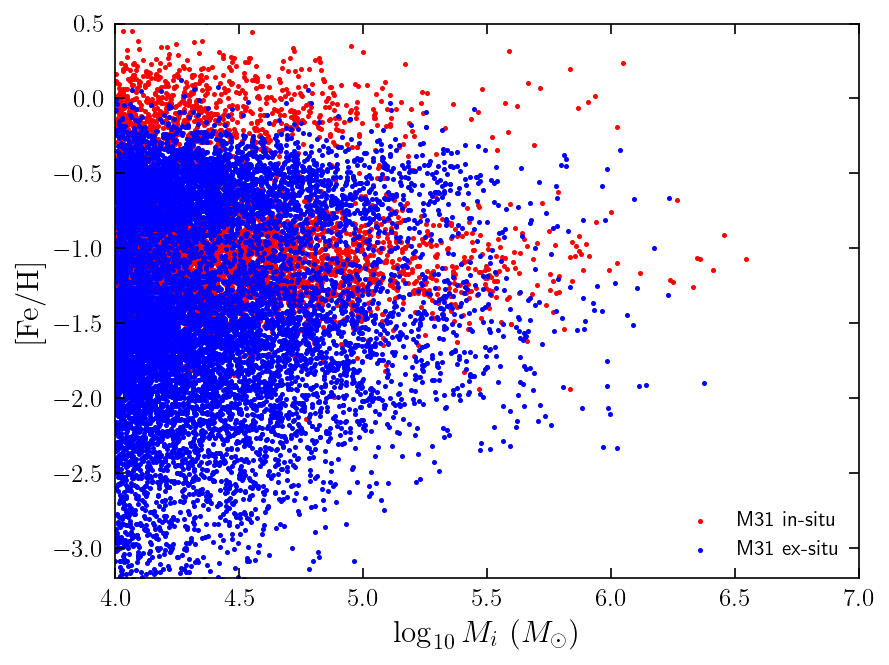

In [11]:
# select survived clusters
idx_in = (data_m31d['host_id_accrete'] < 0) & (data_m31d['galaxy_id'] == hid)
idx_ex = (data_m31d['host_id_accrete'] > 0) & (data_m31d['galaxy_id'] == hid)

# plot clusters formed in-situ (in the central halo) as red
plt.scatter(data_m31d['log_m_form'][idx_in], data_m31d['feh'][idx_in], fc='r', s=2, label='M31 in-situ')

# plot clusters formed ex-situ (in satellite galaxies) as blue
plt.scatter(data_m31d['log_m_form'][idx_ex], data_m31d['feh'][idx_ex], fc='b', s=2, label='M31 ex-situ')

plt.xlabel(r'$\log_{10} M_i\ (M_\odot)$')
plt.ylabel(r'$\rm [Fe/H]$')
plt.xlim(4, 7)
plt.ylim(-3.2, 0.5)
plt.legend(loc='lower right');